In [1]:
from newick import loads
import newick
from DNASkittleUtils.DDVUtils import pp
import csv

# Cafe

Families for study were determined in "FunctionsForFamilies.ipynb" under the name `wgd_study_ints` based on the following criteria:
#### Select families for study in Repeated Loss Tree mode
* Must be in every Oleaceae species
* Must be in > 1 copy in >25% of the species
* Not present in more than two copies in any species
* Must have a std dev > 0, meaning variation is present
* Ks indicates copies were made in the most recent WGD

In [4]:
all_trees = {}
with open(r"CAFE-4.2\data\2020\static_empty\two_rate_static_empty.cafe", 'r') as csvfile:
    lines = csvfile.readlines()[11:]
    for nLines, row in enumerate(lines):
        row = row.split('\t')
        all_trees[int(row[0])] = row[1]
len(all_trees)

8134

In [5]:
all_trees[10000013]

'(((((((((((FRAX30_2:2,FRAX32_1:2)_1:1,FRAX28_1:3)_1:2,FRAX12_0:5)_1:4,(FRAX07_2:8,FRAX29_2:8)_2:1)_1:4,FRAX08_1:13)_1:1,(((((FRAX01_1:2,FRAX16_0:2)_1:4,FRAX15_0:6)_1:2,FRAX00_1:8)_1:2,(FRAX06_2:9,FRAX23_0:9)_1:1)_1:3,FRAX25_1:13)_1:1)_1:3,FRAX21_1:17)_1:2,(((FRAX19_2:8,FRAX20_1:8)_1:2,((FRAX11_2:5,FRAX27_1:5)_1:4,FRAX04_1:9)_1:1)_1:1,(((((FRAX03_1:1,FRAX09_1:1)_1:1,FRAX13_1:2)_1:2,(FRAX26_0:2,FRAX14_0:2)_0:2)_1:3,FRAX05_1:7)_1:2,FRAX33_2:9)_1:2)_1:8)_1:15,FRAX31_1:34)_1:2,Oeuropea_1:36)_1:24,empty_1:60)_1'

In [6]:
list(all_trees.values())[:3]

['(((((((((((FRAX30_1:2,FRAX32_1:2)_1:1,FRAX28_1:3)_1:2,FRAX12_1:5)_1:4,(FRAX07_2:8,FRAX29_1:8)_1:1)_1:4,FRAX08_1:13)_1:1,(((((FRAX01_1:2,FRAX16_1:2)_1:4,FRAX15_1:6)_1:2,FRAX00_0:8)_1:2,(FRAX06_1:9,FRAX23_1:9)_1:1)_1:3,FRAX25_1:13)_1:1)_1:3,FRAX21_1:17)_1:2,(((FRAX19_1:8,FRAX20_1:8)_1:2,((FRAX11_1:5,FRAX27_1:5)_1:4,FRAX04_0:9)_1:1)_1:1,(((((FRAX03_1:1,FRAX09_1:1)_1:1,FRAX13_1:2)_1:2,(FRAX26_1:2,FRAX14_1:2)_1:2)_1:3,FRAX05_1:7)_1:2,FRAX33_1:9)_1:2)_1:8)_1:15,FRAX31_0:34)_1:2,Oeuropea_1:36)_1:24,empty_1:60)_1',
 '(((((((((((FRAX30_1:2,FRAX32_1:2)_1:1,FRAX28_1:3)_1:2,FRAX12_1:5)_1:4,(FRAX07_1:8,FRAX29_1:8)_1:1)_1:4,FRAX08_1:13)_1:1,(((((FRAX01_1:2,FRAX16_1:2)_1:4,FRAX15_0:6)_1:2,FRAX00_1:8)_1:2,(FRAX06_1:9,FRAX23_0:9)_1:1)_1:3,FRAX25_0:13)_1:1)_1:3,FRAX21_1:17)_1:2,(((FRAX19_1:8,FRAX20_0:8)_1:2,((FRAX11_1:5,FRAX27_1:5)_1:4,FRAX04_0:9)_1:1)_1:1,(((((FRAX03_1:1,FRAX09_1:1)_1:1,FRAX13_1:2)_1:2,(FRAX26_0:2,FRAX14_1:2)_1:2)_1:3,FRAX05_1:7)_1:2,FRAX33_1:9)_1:2)_1:8)_1:15,FRAX31_1:34)_1:2,Oeurop

In [7]:
all_ohnologs = list(all_trees.keys())

In [28]:
ordered_names = loads('(((((((((((FRAX30:2,FRAX32:2)<1>:1,FRAX28:3)<3>:2,FRAX12:5)<5>:4,(FRAX07:8,FRAX29:8)<9>:1)<7>:4,FRAX08:13)<11>:1,(((((FRAX01:2,FRAX16:2)<15>:4,FRAX15:6)<17>:2,FRAX00:8)<19>:2,(FRAX06:9,FRAX23:9)<23>:1)<21>:3,FRAX25:13)<25>:1)<13>:3,FRAX21:17)<27>:2,(((FRAX19:8,FRAX20:8)<31>:2,((FRAX11:5,FRAX27:5)<35>:4,FRAX04:9)<37>:1)<33>:1,(((((FRAX03:1,FRAX09:1)<41>:1,FRAX13:2)<43>:2,(FRAX26:2,FRAX14:2)<47>:2)<45>:3,FRAX05:7)<49>:2,FRAX33:9)<51>:2)<39>:8)<29>:15,FRAX31:34)<53>:2,Oeuropea:36)<55>:24,empty<58>:60)<57>')[0]
def create_ordered_nodes(verbose=False):
    ordered_nodes = []
    for node in ordered_names.walk(mode="preorder"):
        if verbose:
            print(node.name, node.length)
        ordered_nodes.append({'name': node.name, 'length':node.length, 'losses': 0, 'gains': 0, 'avg#': 0})
    return ordered_nodes
hello = create_ordered_nodes(True)

<57> 0.0
<55> 24.0
<53> 2.0
<29> 15.0
<27> 2.0
<13> 3.0
<11> 1.0
<7> 4.0
<5> 4.0
<3> 2.0
<1> 1.0
FRAX30 2.0
FRAX32 2.0
FRAX28 3.0
FRAX12 5.0
<9> 1.0
FRAX07 8.0
FRAX29 8.0
FRAX08 13.0
<25> 1.0
<21> 3.0
<19> 2.0
<17> 2.0
<15> 4.0
FRAX01 2.0
FRAX16 2.0
FRAX15 6.0
FRAX00 8.0
<23> 1.0
FRAX06 9.0
FRAX23 9.0
FRAX25 13.0
FRAX21 17.0
<39> 8.0
<33> 1.0
<31> 2.0
FRAX19 8.0
FRAX20 8.0
<37> 1.0
<35> 4.0
FRAX11 5.0
FRAX27 5.0
FRAX04 9.0
<51> 2.0
<49> 2.0
<45> 3.0
<43> 2.0
<41> 1.0
FRAX03 1.0
FRAX09 1.0
FRAX13 2.0
<47> 2.0
FRAX26 2.0
FRAX14 2.0
FRAX05 7.0
FRAX33 9.0
FRAX31 34.0
Oeuropea 36.0
empty<58> 60.0


In [29]:
def extract_count(name):
    if isinstance(name, newick.Node):
        name = name.name
    return int(name.split('_')[-1])

for node in loads(all_trees[10000013])[0].walk(mode="preorder"):
    print(node.name, extract_count(node.name))

_1 1
_1 1
_1 1
_1 1
_1 1
_1 1
_1 1
_1 1
_1 1
_1 1
_1 1
FRAX30_2 2
FRAX32_1 1
FRAX28_1 1
FRAX12_0 0
_2 2
FRAX07_2 2
FRAX29_2 2
FRAX08_1 1
_1 1
_1 1
_1 1
_1 1
_1 1
FRAX01_1 1
FRAX16_0 0
FRAX15_0 0
FRAX00_1 1
_1 1
FRAX06_2 2
FRAX23_0 0
FRAX25_1 1
FRAX21_1 1
_1 1
_1 1
_1 1
FRAX19_2 2
FRAX20_1 1
_1 1
_1 1
FRAX11_2 2
FRAX27_1 1
FRAX04_1 1
_1 1
_1 1
_1 1
_1 1
_1 1
FRAX03_1 1
FRAX09_1 1
FRAX13_1 1
_0 0
FRAX26_0 0
FRAX14_0 0
FRAX05_1 1
FRAX33_2 2
FRAX31_1 1
Oeuropea_1 1
empty_1 1


In [30]:
def populate_history_histogram(study_ints):
    ordered_nodes = create_ordered_nodes()
    genes_lost = {node['name']:set() for node in ordered_nodes}
    for fam_id in study_ints:
        newick_str = all_trees[fam_id]
        tree = loads(newick_str)[0]
        for index, node in enumerate(tree.walk(mode="preorder")):
            count = extract_count(node)
            tail = ''
            ordered_nodes[index]['avg#'] += count
            if node.ancestor:
                parent_count = extract_count(node.ancestor.name)
                if count < parent_count:
                    tail = ("loss")
                    ordered_nodes[index]['losses'] += 1 #parent_count - count
                    place_name = node.name.split('_')[0]
                    if place_name:
                        genes_lost[place_name].add(fam_id)  # record gene family
                elif count > parent_count:
                    tail = ("gain")
                    ordered_nodes[index]['gains'] += 1 #count - parent_count 
#             print(node.name, count, tail)
    for result in ordered_nodes:  # divide sum by length to get mean
        result['avg#'] /= len(study_ints)
    return ordered_nodes, genes_lost
ordered_nodes, genes_lost = populate_history_histogram(all_ohnologs)
ordered_nodes

[{'avg#': 1.0, 'gains': 0, 'length': 0.0, 'losses': 0, 'name': '<57>'},
 {'avg#': 1.0409392672731743,
  'gains': 313,
  'length': 24.0,
  'losses': 0,
  'name': '<55>'},
 {'avg#': 1.0410622080157363,
  'gains': 1,
  'length': 2.0,
  'losses': 0,
  'name': '<53>'},
 {'avg#': 1.0281534300467174,
  'gains': 113,
  'length': 15.0,
  'losses': 232,
  'name': '<29>'},
 {'avg#': 0.9954511925252029,
  'gains': 9,
  'length': 2.0,
  'losses': 275,
  'name': '<27>'},
 {'avg#': 0.9899188591099091,
  'gains': 29,
  'length': 3.0,
  'losses': 75,
  'name': '<13>'},
 {'avg#': 0.9452913695598721,
  'gains': 35,
  'length': 1.0,
  'losses': 399,
  'name': '<11>'},
 {'avg#': 0.9440619621342513,
  'gains': 49,
  'length': 4.0,
  'losses': 61,
  'name': '<7>'},
 {'avg#': 0.9061962134251291,
  'gains': 29,
  'length': 4.0,
  'losses': 337,
  'name': '<5>'},
 {'avg#': 0.8889845094664371,
  'gains': 39,
  'length': 2.0,
  'losses': 180,
  'name': '<3>'},
 {'avg#': 0.848168182935825,
  'gains': 28,
  'length

# Histogram of change per time interval

In [32]:
def ancestors_length(node):
    ancestors = []
    while node.ancestor:
        node = node.ancestor
        ancestors.append(node.length)
    return ancestors

def populate_change_histogram(results_per_node, blacklist_index):
    losses_per_interval = [0] * 79  # contain sums of changes
    gains_per_interval = [0] * 79  # contain sums of changes
    branch_occupancy = [0] * 79  # number of branches at that interval for normalization


    for node_i, node in enumerate(ordered_names.walk(mode="preorder")):
        if node_i not in blacklist_index:
            ancestor_sum_length = int(sum(ancestors_length(node)))
            my_end = ancestor_sum_length + int(node.length)
            for year in range(ancestor_sum_length, my_end):
                losses_per_interval[year] += results_per_node[node_i]['losses'] / node.length
                gains_per_interval[year] += results_per_node[node_i]['gains'] / node.length
                branch_occupancy[year] += 1
    print(gains_per_interval)
    print(branch_occupancy)
    normalized_losses = [losses / max(1,branches) for (losses, branches) in zip(losses_per_interval, branch_occupancy) ]
    normalized_gains = [gains / max(1,branches) for (gains, branches) in zip(gains_per_interval, branch_occupancy) ]
    print(normalized_gains)
    return normalized_losses, normalized_gains

In [33]:
%%html
<img src="CAFE-4.2/data/homeologs_only/reports/tree_nodes.png">

In [34]:
normalized_losses, normalized_gains = populate_change_histogram(ordered_nodes, [])

[13.041666666666666, 13.041666666666666, 13.041666666666666, 13.041666666666666, 13.041666666666666, 13.041666666666666, 13.041666666666666, 13.041666666666666, 13.041666666666666, 13.041666666666666, 13.041666666666666, 13.041666666666666, 13.041666666666666, 13.041666666666666, 13.041666666666666, 13.041666666666666, 13.041666666666666, 13.041666666666666, 13.041666666666666, 13.041666666666666, 13.041666666666666, 13.041666666666666, 13.041666666666666, 13.041666666666666, 33.138888888888886, 33.138888888888886, 43.613398692810456, 43.613398692810456, 43.613398692810456, 43.613398692810456, 43.613398692810456, 43.613398692810456, 43.613398692810456, 43.613398692810456, 43.613398692810456, 43.613398692810456, 43.613398692810456, 43.613398692810456, 43.613398692810456, 43.613398692810456, 43.613398692810456, 46.20506535947712, 46.20506535947712, 58.959967320261434, 58.959967320261434, 58.959967320261434, 97.29330065359477, 91.69714680744092, 91.69714680744092, 107.07214680744092, 135.

In [35]:
print(normalized_gains[:-7])
print(normalized_gains[-7:])

[6.520833333333333, 6.520833333333333, 6.520833333333333, 6.520833333333333, 6.520833333333333, 6.520833333333333, 6.520833333333333, 6.520833333333333, 6.520833333333333, 6.520833333333333, 6.520833333333333, 6.520833333333333, 6.520833333333333, 6.520833333333333, 6.520833333333333, 6.520833333333333, 6.520833333333333, 6.520833333333333, 6.520833333333333, 6.520833333333333, 6.520833333333333, 6.520833333333333, 6.520833333333333, 6.520833333333333, 11.046296296296296, 11.046296296296296, 10.903349673202614, 10.903349673202614, 10.903349673202614, 10.903349673202614, 10.903349673202614, 10.903349673202614, 10.903349673202614, 10.903349673202614, 10.903349673202614, 10.903349673202614, 10.903349673202614, 10.903349673202614, 10.903349673202614, 10.903349673202614, 10.903349673202614, 9.241013071895424, 9.241013071895424, 9.826661220043572, 9.826661220043572, 9.826661220043572, 13.899042950513538, 10.188571867493435, 10.188571867493435, 10.70721468074409, 11.256012233953408, 12.348259

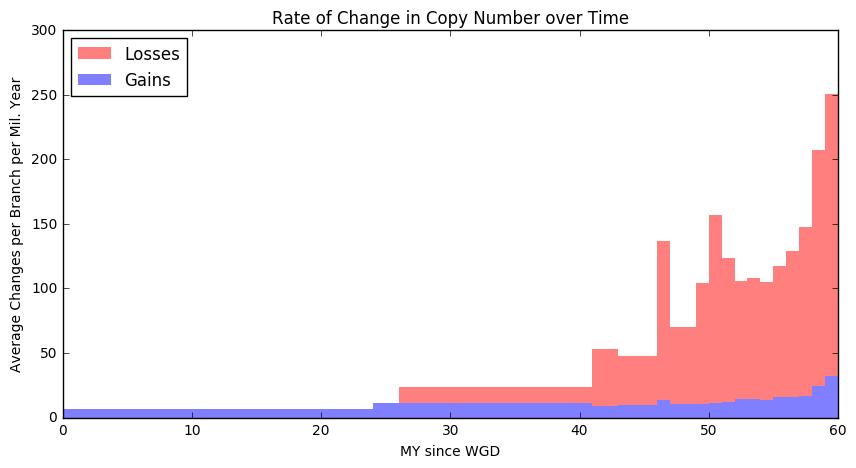

In [59]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def plot_time_histogram(normalized_losses, normalized_gains, start_year=0):
    # plot time_intervals,  plot gains in different colors
    fig, ax = plt.subplots(figsize=(10,5), dpi=300)
    end = -12
    xs = np.arange(0, len(normalized_losses[start_year:end]))
    bar_width = 1
    ax.bar(xs, normalized_losses[start_year:end], bar_width,
                    alpha=.5, color='r', linewidth=0,
                    label='Losses')
    ax.bar(xs, normalized_gains[start_year:end], bar_width,
                    alpha=1., color='#7F7FFF', linewidth=0,
                    label='Gains')
    ax.set_xlabel('MY since WGD')
    ax.set_ylabel('Average Changes per Branch per Mil. Year')
    ax.set_title('Rate of Change in Copy Number over Time')
    # ax.set_xticks(index + bar_width / 2)
    # ax.set_xticklabels(('A', 'B', 'C', 'D', 'E'))
    ax.legend(loc='upper left')
    # fig.tight_layout()
    plt.savefig('CAFE-4.2/data/2020/rate_of_change.png', dpi=300)
plot_time_histogram(normalized_losses[:-7], normalized_gains[:-7])  

**Conclusion: Supports lag-time model though could be from incomplete assembly and annotation.**

normalized_losses[:-7]

In [15]:
from scipy.stats import ranksums
simulated_losses = [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.666666666666664,41.666666666666664,97.9673202614379,97.9673202614379,97.9673202614379,97.9673202614379,97.9673202614379,97.9673202614379,97.9673202614379,97.9673202614379,97.9673202614379,97.9673202614379,97.9673202614379,97.9673202614379,97.9673202614379,97.9673202614379,97.9673202614379,93.8296568627451,93.8296568627451,83.27352941176471,83.27352941176471,83.27352941176471,95.61683006535948,77.05076357466064,77.05076357466064,77.51734539969834,89.04449472096532,81.31966649907825,75.14833319367632,74.53025049425977,74.08707130288012,72.80870118443647,72.86774316192475,73.00519830795567,73.34374140681915,73.02154342727366]
print(ranksums(normalized_losses[36:-7], simulated_losses[36:]))
ranksums(normalized_losses[56:-7], simulated_losses[56:])

RanksumsResult(statistic=0.7095242473194603, pvalue=0.4779992100249857)


RanksumsResult(statistic=4.070403151799809, pvalue=4.6931849057715643e-05)

### Prefiltering for genes that are copy 2 at root

In [16]:
ordered_nodes[0]

{'avg#': 1.2516501650165017,
 'gains': 0,
 'length': 36.0,
 'losses': 0,
 'name': '<55>'}

In [39]:
def get_count_at_root(fam_id, ordered_node_index=0):
    newick_str = all_trees[fam_id]
    tree = loads(newick_str)[0]
    for index, node in enumerate(tree.walk(mode="preorder")):
        if index == ordered_node_index:
            count = extract_count(node)
            return count

In [40]:
    
filtered_wgd_study_ints = [fam for fam in all_ohnologs if get_count_at_root(fam) == 2]
assert all([get_count_at_root(fam)==2 for fam in filtered_wgd_study_ints])

print(pp(len(filtered_wgd_study_ints) / len(all_ohnologs)), 'preserved')

0.0 preserved


In [19]:
def i_hist(values):
    bins = [0] * (max(values) +1)
    for v in values:
        bins[v] += 1
    return bins

copies = [ get_count_at_root(fam) for fam in all_ohnologs]
print(i_hist(copies))

[0, 6599, 1699, 146, 30, 4, 3, 0, 2, 0, 1]


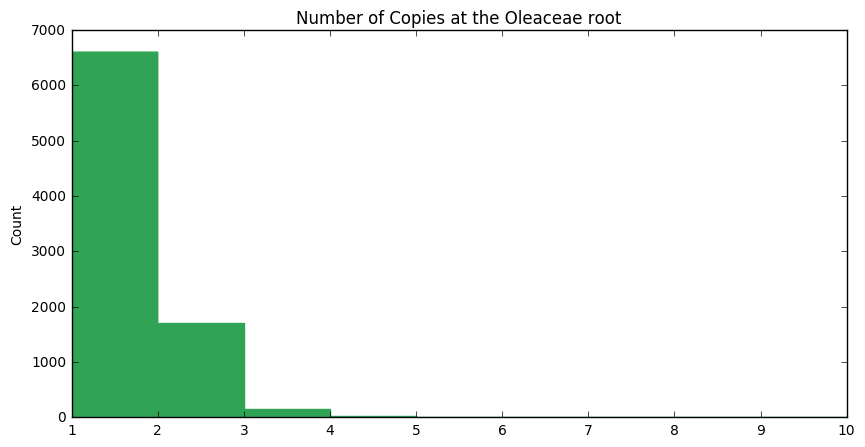

In [20]:
import pandas
def pretty_hist(title, raw_values, x_title="", y_title="Count", xmax=None, bins=None):
    if xmax is None:
        xmax = max(raw_values)
    if bins is None:
        bins = xmax - min(raw_values)
    if not isinstance(bins, int):
        bins = 10
    c_values = [v for v in raw_values if v <= xmax]
    df = pandas.Series(c_values)#, columns=['Family ID', 'Copies'])
    f = df.hist(bins=bins, figsize=(10,5), facecolor='#31a354', edgecolor='#31a354')#dpi=300)
    f.grid(False)
#     f.set_xticks([i for i in range(min(raw_values), xmax) if i % (bins//8) == 0])
    f.set_title(title)
    f.set_xlabel(x_title)
    f.set_ylabel(y_title)

pretty_hist('Number of Copies at the Oleaceae root', [c for c in copies if c < 21])

## Patterns of Repeated Loss
All families in the study have at least one loss event present which could affect one or more species depending on the position in the tree.  If the species with copy number 1 are all monophyletic, then only one event is necessary.  If they are polyphyletic, then multiple events are necessary.  But what is our null distribution?  What is a chance scattering uniformly across time?  Is it similar to our history histogram?

In [21]:
def collect_loss_events_per_family(study_ints, blacklist_index):
    ordered_nodes = create_ordered_nodes()
    loss_events_per_family = {}
    for fam_id in study_ints:
        current_family_loss_events = 0
        species_total = 0
        newick_str = all_trees[fam_id]
        tree = loads(newick_str)[0]
        for index, node in enumerate(tree.walk(mode="preorder")):
            count = extract_count(node)
            if node.ancestor and index not in blacklist_index:
                if not node.name.startswith('_'):
                    species_total += count
                parent_count = extract_count(node.ancestor.name)
                if count < parent_count:  # "loss"
                    current_family_loss_events += 1
                elif count > parent_count:  # gain
                    pass
        loss_events_per_family[fam_id] = current_family_loss_events
    pretty_hist("Repeated Loss in the Same Gene Family", list(loss_events_per_family.values()))
    return loss_events_per_family

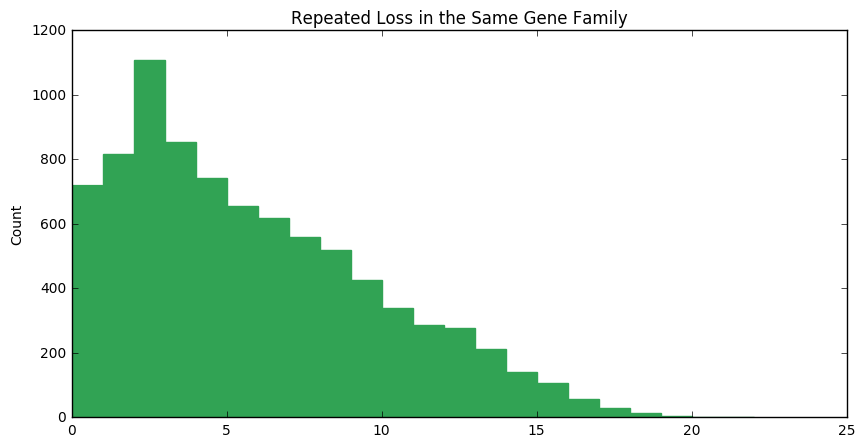

In [22]:
all_loss_events = collect_loss_events_per_family(list(all_trees.keys()), [])

**One Single distribution! down from a mixture**

* families of different size, big families can have more losses
* Annotation errors
* Different selective constraints

In [23]:
#For exporting to simulation notebook
print(' '.join([str(x) for x in all_loss_events.values()]))

3 0 4 3 3 1 0 1 2 3 2 1 0 8 6 2 11 12 0 3 1 7 4 0 3 0 9 6 0 1 2 1 9 4 8 16 6 1 4 5 2 2 1 11 4 1 1 0 1 1 1 7 0 15 11 4 0 3 4 1 1 0 9 2 8 6 0 0 0 9 2 4 2 0 4 2 2 9 1 6 3 0 7 5 12 9 1 0 3 3 4 0 3 0 1 0 0 0 0 1 0 1 2 3 3 2 0 2 2 0 6 0 2 3 0 4 4 3 2 1 1 10 11 9 1 7 12 10 2 3 16 2 8 6 1 3 1 0 2 1 1 2 12 0 2 1 1 10 3 6 4 6 0 4 7 0 11 0 2 10 2 3 2 12 8 1 0 1 4 10 8 3 10 1 0 2 1 2 6 0 2 0 5 2 17 8 10 1 4 5 4 1 12 2 10 2 2 4 2 0 4 13 3 1 5 0 3 2 11 11 2 3 0 1 3 7 0 14 2 4 2 5 8 5 0 9 12 3 4 10 13 1 0 7 1 7 2 3 1 2 2 3 7 1 4 0 7 3 4 3 2 1 1 3 0 10 12 2 1 2 14 0 1 2 2 1 8 6 2 1 2 6 6 2 1 0 6 0 0 3 3 1 5 2 1 3 12 1 2 2 13 4 2 6 1 1 14 0 4 2 0 0 0 4 2 2 7 2 8 6 6 2 6 4 4 0 0 1 15 1 6 1 0 3 3 3 7 0 1 11 1 4 0 5 3 1 2 2 6 1 3 0 7 2 8 10 0 5 9 13 3 4 0 0 3 0 3 1 2 0 12 0 1 1 2 4 1 0 4 8 0 1 10 2 2 3 5 7 10 1 1 10 1 0 5 7 1 2 5 8 0 4 0 2 2 0 7 1 1 0 1 3 5 2 2 4 0 2 11 12 3 1 12 6 7 7 2 1 4 0 1 1 12 0 0 2 1 10 2 6 6 2 14 0 2 3 5 2 2 4 3 2 1 2 7 2 1 2 2 2 3 0 13 1 7 4 1 1 0 0 3 10 1 9 1 3 9 0 17 0 1 2 3 1

In [24]:
len(filtered_wgd_study_ints)

1699

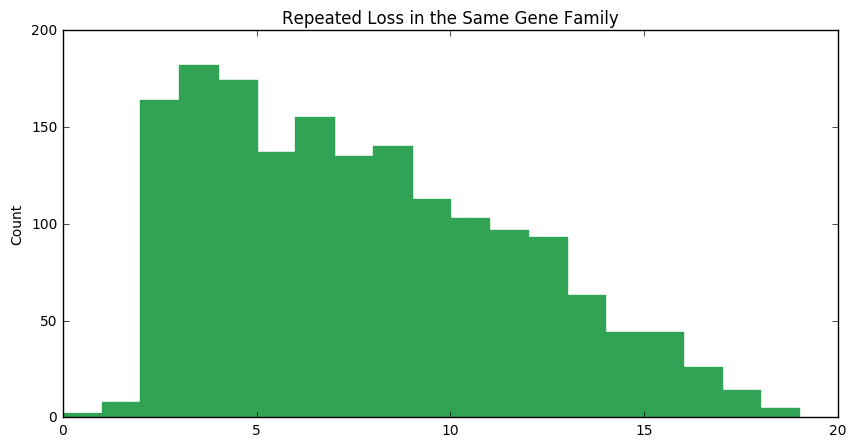

In [101]:
wgd_study_losses = collect_loss_events_per_family(filtered_wgd_study_ints, [])

**Conclusion**: The additional filtering for copy number 2 at the root can be safely ignored.  It's less objective of a constraint than using the gene trees, which I've already done.

## Categorical Histograms combined

In [52]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def categorical_histogram(title, datasets, normalize=False, xmax=None, x_title='',
                         y_title='Count'):
    # plot time_intervals,  plot gains in different colors
    fig, ax = plt.subplots(figsize=(10,5), dpi=600, facecolor='white')
    hist_series = [[label, i_hist(values)] for label, values in datasets.items()]
    longest = max([len(hist[1]) for hist in hist_series]) 
    minimum = min([min(hist) for hist in datasets.values()])
    if xmax:
        longest = min(xmax-minimum, longest)
    for i, pair in enumerate(hist_series):
        hist_series[i][1] = (hist_series[i][1] + [0] * longest)[:longest] # zero padding
    xs = np.arange(0, longest)  # set x axis
    bar_width = 1
    cmap = plt.get_cmap("Dark2")
    colors = cmap(np.arange(len(datasets))*50)

    height_sorted = sorted(hist_series, key=lambda pair: -max(pair[1]))
    tops = [max(pair[1]) for pair in height_sorted]
    for i, pair in enumerate(height_sorted):
        label, bars = pair
        adjusted_bars = [b*(tops[0] / tops[i]) for b in bars]
        if normalize:
            bars = adjusted_bars
        ax.bar(xs, bars, bar_width,
                    alpha=.6, color=colors[i], linewidth=0,
                    label=label)
        
    ax.set_xlabel(x_title)
    ax.set_ylabel(y_title)
    ax.set_title(title)
    # ax.set_xticks(index + bar_width / 2)
    # ax.set_xticklabels(('A', 'B', 'C', 'D', 'E'))
    ax.legend(loc='upper right')
    # fig.tight_layout()
    

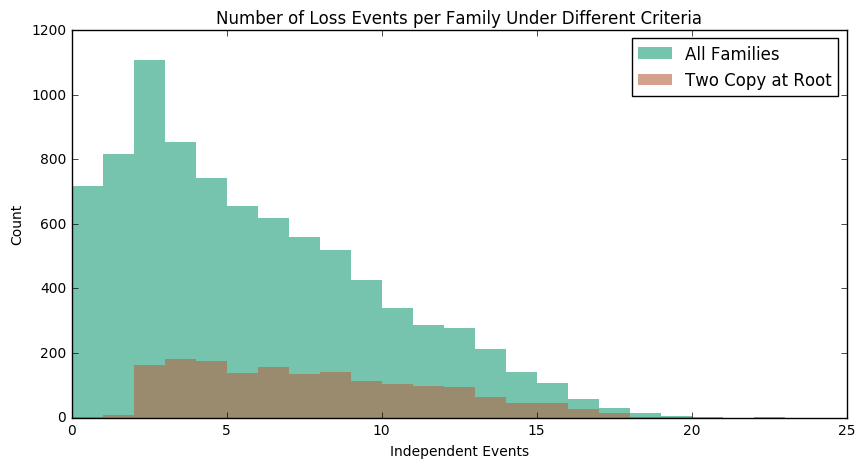

In [102]:
categorical_histogram('Number of Loss Events per Family Under Different Criteria',
    {'All Families': all_loss_events.values(),
     'Two Copy at Root': wgd_study_losses.values(),
    }, x_title='Independent Events')

len(all_loss_events.values())

In [29]:
pp(len(all_trees))

'8,484'

# Intersecting Sets of Polyphyletic losses within Ohnolog subtree

In [25]:
from scipy.stats import hypergeom

def simple_overlap_prob(A, B, all_possible, verbose=True):
    intersect = len(set(A).intersection(set(B)))
    if verbose:
        print(pp(len(A)), "overlapping with", pp(len(B)), "by", pp(intersect),"in a space of size", pp(len(all_possible)))
    return min(1, hypergeom.sf(intersect-1, len(all_possible), len(A), len(B)))  # pval assuming even distribution

In [26]:
len(all_ohnologs)

8484

In [27]:
species_names = [node['name'] for node in ordered_nodes if not node['name'].startswith('<')]  # 
probs = dict()
from statistics import mean, median
# All pair wise combintations once
for x in range(len(species_names)):
    for y in range(x+1, len(species_names)):
        intersect = genes_lost[species_names[x]].intersection(genes_lost[species_names[y]])
        print(species_names[x], species_names[y], len(intersect), end=': ')
        prob = simple_overlap_prob(genes_lost[species_names[x]], genes_lost[species_names[y]], all_ohnologs, verbose=False)
        probs[(species_names[x], species_names[y])] = prob
        print(prob) #TODO probability

FRAX30 FRAX32 0: 1
FRAX30 FRAX28 274: 1.5443495696363887e-73
FRAX30 FRAX12 303: 7.727789520578445e-49
FRAX30 FRAX07 100: 2.321644032359952e-09
FRAX30 FRAX29 204: 1.114888820942682e-16
FRAX30 FRAX08 321: 9.30620044043776e-35
FRAX30 FRAX01 78: 0.002072051363989247
FRAX30 FRAX16 168: 8.591378201989974e-09
FRAX30 FRAX15 169: 1.0063297635399518e-06
FRAX30 FRAX00 106: 1.4121449230766218e-06
FRAX30 FRAX06 85: 1.2996721077506228e-06
FRAX30 FRAX23 179: 8.072021351555108e-09
FRAX30 FRAX25 276: 1.1117829559884959e-11
FRAX30 FRAX21 316: 1.4620073550844633e-15
FRAX30 FRAX19 64: 0.0010112515112789078
FRAX30 FRAX20 166: 0.0005816732932369474
FRAX30 FRAX11 42: 0.11752746426527405
FRAX30 FRAX27 103: 0.0010262746077014278
FRAX30 FRAX04 146: 0.0007472256357458184
FRAX30 FRAX03 153: 0.00022981897121383945
FRAX30 FRAX09 49: 0.03569661395857489
FRAX30 FRAX13 159: 0.0009894374471250203
FRAX30 FRAX26 57: 0.015251931358944808
FRAX30 FRAX14 123: 0.0007075012389988968
FRAX30 FRAX05 196: 5.526219165374509e-08
FRA

** Conclusion: Probabilities of overlapping sets are almost always highly significant!  **

In [37]:
print(pp(len([c for c in probs.values() if c <= .0001]) / len(probs)), "of", len(probs), "species pairs have significant overlap!")

69.458128% of 406 species pairs have significant overlap!


**69.458128% of species pairs have significant overlap!**

In [38]:
print(round(len(probs) * .69458), "pairs were significant and we can safely discard up to 30 pairs as being sister species.")

282 pairs were significant and we can safely discard up to 30 pairs as being sister species.


### TODO: Output this in a square table using pandas

## Further verification of overlap Significance

#### What's the mean overlaps %?
Find average amount of overlap between species pairs as compared to total size of losses in that species

In [39]:
# All pair wise combintations once
overlap_percentages = []
for x in range(len(species_names)):
    for y in range(x+1, len(species_names)):
        intersect = genes_lost[species_names[x]].intersection(genes_lost[species_names[y]])
        print(species_names[x], species_names[y], len(intersect), end=': ')
        p1 = len(intersect) / len(genes_lost[species_names[x]])
        p2 = len(intersect) / len(genes_lost[species_names[y]])
        overlap_percentages.append(p1); overlap_percentages.append(p2)
        print(pp(p1), pp(p2))
print("Average")
pp(mean(overlap_percentages))

FRAX30 FRAX32 0: 0.0 0.0
FRAX30 FRAX28 274: 36.631016% 26.095238%
FRAX30 FRAX12 303: 40.508021% 19.165085%
FRAX30 FRAX07 100: 13.368984% 15.797788%
FRAX30 FRAX29 204: 27.272727% 15.044248%
FRAX30 FRAX08 321: 42.914439% 16.050000%
FRAX30 FRAX01 78: 10.427807% 12.093023%
FRAX30 FRAX16 168: 22.459893% 13.197172%
FRAX30 FRAX15 169: 22.593583% 12.317784%
FRAX30 FRAX00 106: 14.171123% 13.712807%
FRAX30 FRAX06 85: 11.363636% 14.629948%
FRAX30 FRAX23 179: 23.930481% 12.989840%
FRAX30 FRAX25 276: 36.898396% 12.404494%
FRAX30 FRAX21 316: 42.245989% 12.731668%
FRAX30 FRAX19 64: 8.556150% 12.929293%
FRAX30 FRAX20 166: 22.192513% 11.059294%
FRAX30 FRAX11 42: 5.614973% 10.606061%
FRAX30 FRAX27 103: 13.770053% 11.771429%
FRAX30 FRAX04 146: 19.518717% 11.213518%
FRAX30 FRAX03 153: 20.454545% 11.417910%
FRAX30 FRAX09 49: 6.550802% 11.395349%
FRAX30 FRAX13 159: 21.256684% 11.003460%
FRAX30 FRAX26 57: 7.620321% 11.704312%
FRAX30 FRAX14 123: 16.443850% 11.538462%
FRAX30 FRAX05 196: 26.203209% 12.397217%
F

'21.277025%'

So the average overlap is 21% of all losses in that species.  Is that higher than the total families lost in that species?

In [40]:
mean([len(genes_lost[species]) for species in species_names])

1231.7931034482758

In [41]:
# These numbers were pulled in from sums of oleaceae_homeologs_one_rate_anc.csv
csv_anc_totals = [6209,8173,6669,6069,8327,6236,8118,8705,7581,8126,6089,7682,7886,6660,6215,6823,9230,6878,5879,6422,7228,6202,6943,8194,8531,7413,7214,8625,6268,8085,7419,7870,7111,7939,6574,8132,7269,6541,7395,6505,6059,8015,7600,6580,10686,6868,8216,6571,7245,8115,7381,7683,9043,6655,7069,7764]
csv_anc_names = 'FRAX08	<33>	FRAX05	FRAX25	<25>	FRAX14	<21>	<27>	<31>	<23>	FRAX15	<35>	<37>	FRAX32	FRAX21	FRAX33	Oeuropea	FRAX26	FRAX16	FRAX03	FRAX07	FRAX23	FRAX31	<11>	<39>	FRAX09	FRAX19	<13>	FRAX12	<49>	<17>	<43>	<15>	<19>	FRAX29	<9>	<47>	FRAX01	FRAX00	FRAX13	FRAX20	<45>	<3>	FRAX30	<53>	FRAX27	<51>	FRAX04	<1>	<7>	FRAX11	<41>	<29>	FRAX28	FRAX06	<5>'.split('\t')
species_totals = dict(zip(csv_anc_names, csv_anc_totals))
species_totals['FRAX08']

6209

In [42]:
from statistics import mean, median
mean([species_totals[s] for s in species_names])

6718.793103448276

In [43]:
print("Average percentage of genes lost", pp(1316.7931 / (6718.7931 + 1316.7931)))

Average percentage of genes lost 16.387020%


#### Percentage of all gene families, not just the losses

In [44]:
overlap_percentages = []
for x in range(len(species_names)):
    for y in range(x+1, len(species_names)):
        intersect = genes_lost[species_names[x]].intersection(genes_lost[species_names[y]])
        print(species_names[x], species_names[y], len(intersect), end=': ')
        p1 = len(intersect) / species_totals[species_names[x]]
        p2 = len(intersect) / species_totals[species_names[y]]
        overlap_percentages.append(p1); overlap_percentages.append(p2)
        print(pp(p1), pp(p2))
print("Average")
pp(sum(overlap_percentages) / len(overlap_percentages))

FRAX30 FRAX32 0: 0.0 0.0
FRAX30 FRAX28 274: 4.164134% 4.117205%
FRAX30 FRAX12 303: 4.604863% 4.834078%
FRAX30 FRAX07 100: 1.519757% 1.383509%
FRAX30 FRAX29 204: 3.100304% 3.103134%
FRAX30 FRAX08 321: 4.878419% 5.169915%
FRAX30 FRAX01 78: 1.185410% 1.192478%
FRAX30 FRAX16 168: 2.553191% 2.857629%
FRAX30 FRAX15 169: 2.568389% 2.775497%
FRAX30 FRAX00 106: 1.610942% 1.433401%
FRAX30 FRAX06 85: 1.291793% 1.202433%
FRAX30 FRAX23 179: 2.720365% 2.886166%
FRAX30 FRAX25 276: 4.194529% 4.547701%
FRAX30 FRAX21 316: 4.802432% 5.084473%
FRAX30 FRAX19 64: 0.972644% 0.887164%
FRAX30 FRAX20 166: 2.522796% 2.739726%
FRAX30 FRAX11 42: 0.638298% 0.569029%
FRAX30 FRAX27 103: 1.565350% 1.499709%
FRAX30 FRAX04 146: 2.218845% 2.221884%
FRAX30 FRAX03 153: 2.325228% 2.382435%
FRAX30 FRAX09 49: 0.744681% 0.661001%
FRAX30 FRAX13 159: 2.416413% 2.444274%
FRAX30 FRAX26 57: 0.866261% 0.828729%
FRAX30 FRAX14 123: 1.869301% 1.972418%
FRAX30 FRAX05 196: 2.978723% 2.938971%
FRAX30 FRAX33 174: 2.644377% 2.550198%
FRAX30

'3.927549%'

In [45]:
print("I would expect overlap of ", pp(.1638 * .1638), "to be not significant")

I would expect overlap of  2.683044% to be not significant


Previous studies in order:  
FRAX00 FRAX03 112: **0.906**7841591878111  
FRAX00 FRAX03 112: 14.231258% 8.358209%  
FRAX00 FRAX03 112: 1.514537% 1.744005%   
  
**Conclusion:** Negative control is behaving as it should.

FRAX00 Oeuropea 263: 7.022379897503273**e-36**  
FRAX00 Oeuropea 263: 33.418043% 19.030391%  
FRAX00 Oeuropea 263: 3.556457% 2.849404%  

FRAX06 FRAX03 192: **0.15**890200229390933  
FRAX06 FRAX03 192: 16.842105% 14.328358%  
FRAX06 FRAX03 192: 2.716084% 2.989723%  
**Conclusion:** An overlap becomes statistically signficant very quickly after crossing the ~2.6% threshold.

_____________________

# Left vs Right Ohnolog Pair Comparison

In [46]:
print(all_loss_events)

{20004865: 3, 20004866: 0, 10010627: 4, 20003142: 3, 20004869: 3, 20004870: 1, 20004871: 0, 20004872: 1, 20004873: 2, 20004875: 3, 20004877: 2, 20004879: 1, 20004880: 0, 20004883: 8, 10010645: 6, 10010646: 2, 10010647: 11, 20004889: 12, 20004890: 0, 20004892: 3, 20004893: 1, 20004894: 7, 20004895: 4, 20004896: 0, 20004898: 3, 20004899: 0, 20004900: 9, 10010630: 6, 20004902: 0, 20004903: 1, 20004905: 2, 20004906: 1, 10010667: 9, 20004908: 4, 10010669: 8, 20004912: 16, 10010673: 6, 20004914: 1, 20004915: 4, 10007301: 5, 20004918: 2, 10010633: 2, 20004922: 1, 10010683: 11, 20004929: 4, 20004930: 1, 20004931: 1, 20004932: 0, 20004934: 1, 20004935: 1, 20004936: 1, 10010697: 7, 20004938: 0, 20004939: 15, 10010700: 11, 20004941: 4, 20004942: 0, 20004943: 3, 20004944: 4, 20004945: 1, 20004946: 1, 20004947: 0, 10010709: 9, 20004950: 2, 20004951: 8, 10010713: 6, 20004954: 0, 20004955: 0, 20004958: 0, 10010719: 9, 20004960: 2, 20004961: 4, 20004962: 2, 20004963: 0, 20004964: 4, 20004965: 2, 20004

In `all_loss_events` we have the sum of loss events on each branch.  This could be used to summarize a rate of loss, but it's not appropriate to assume these are the same as extant copies.  Since a loss back in time will knock out a whole range of species, but a recent loss will only affect one species.

In [47]:
left_side = [k for k in all_loss_events.keys() if k >= 20000000]
len(left_side)

4242

In [48]:
def get_opposite_side(index):
    if index >= 20000000:
        return index - 10000000
    else:
        return index + 10000000
assert all([get_opposite_side(left) in all_loss_events for left in all_loss_events.keys()])

Simply graphing the total pooled counts is going to give you the same histogram you've already seen:

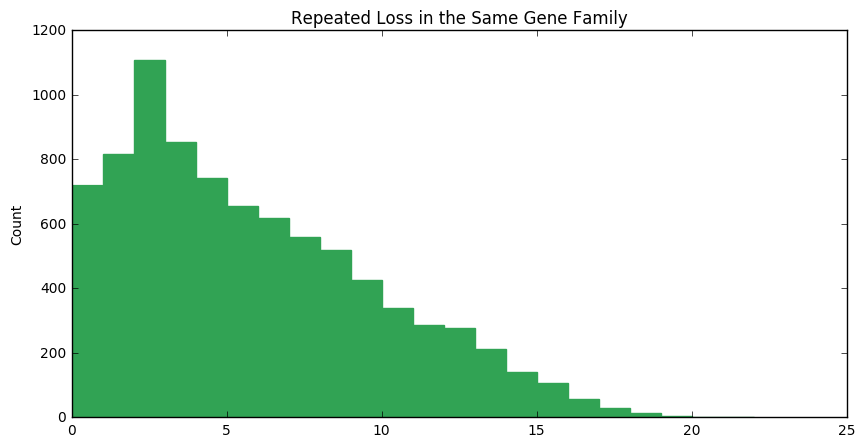

In [49]:
pretty_hist("Repeated Loss in the Same Gene Family", list(all_loss_events.values()))

### For each pair, sort larger and smaller subtree

In [54]:
def sort_pairs_to_bigger_smaller(left_side, event_dict):
    big_family_losses = []
    small_family_losses = [] # this terminology is really confusing
    bigger_side = []
    for left in left_side:
        right = get_opposite_side(left)
        biggest = left if event_dict[left] <  event_dict[right] else right # less loss events ~= more extant copies
        bigger_side.append(biggest)
        big_family_losses.append(event_dict[biggest])
        small_family_losses.append(event_dict[get_opposite_side(biggest)])
    return biggest, big_family_losses, small_family_losses
biggest, big_family_losses, small_family_losses = sort_pairs_to_bigger_smaller(left_side, all_loss_events)
len(big_family_losses), max(big_family_losses), max(small_family_losses)

(4242, 17, 22)

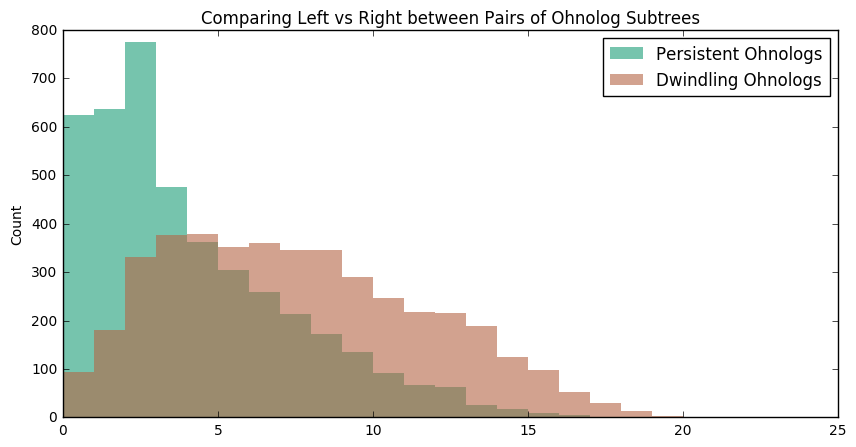

In [55]:
categorical_histogram("Comparing Left vs Right between Pairs of Ohnolog Subtrees", {"Persistent Ohnologs": big_family_losses, "Dwindling Ohnologs": small_family_losses})

**Question:** Is that more divergence than we'd expect from a simulated distribution that was then sorted?  Can I simulated the data somehow?  
  
**Plan:** Randomly shuffle all 8484 keys of `all_loss_events`, repeat process.

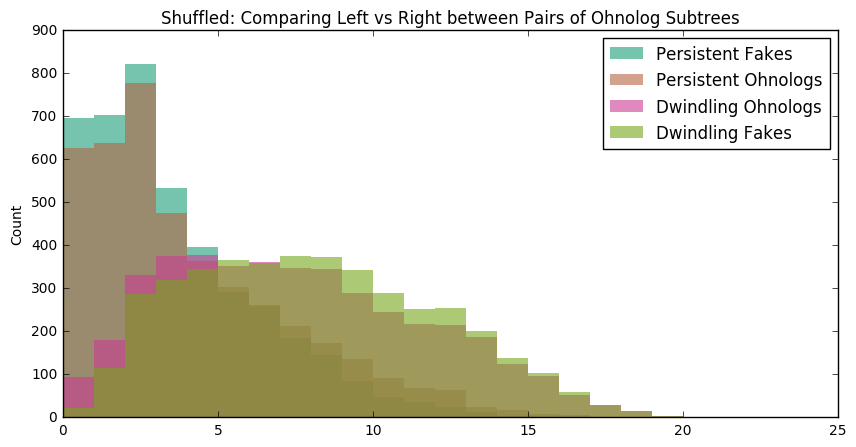

In [56]:
import random

def shuffler(all_loss_events):
    shuffled_values = list(all_loss_events.values())
    random.shuffle(shuffled_values)
    shuffled_events = {}
    for i, key in enumerate(all_loss_events.keys()):
        shuffled_events[key] = shuffled_values[i]
    return shuffled_events

def compare_against_shuffled_pairs(all_loss_events, left_side, xmax=None):
    discarded, big_family_losses, small_family_losses = sort_pairs_to_bigger_smaller(left_side, all_loss_events)
    shuffled_events = shuffler(all_loss_events)
    discard, shuffle_big, shuffle_small = sort_pairs_to_bigger_smaller(left_side, shuffled_events)    
    categorical_histogram("Shuffled: Comparing Left vs Right between Pairs of Ohnolog Subtrees", {"Persistent Fakes": shuffle_big, "Dwindling Fakes": shuffle_small,
                                                                                                  "Persistent Ohnologs": big_family_losses, "Dwindling Ohnologs": small_family_losses},
                         xmax=xmax)

compare_against_shuffled_pairs(all_loss_events, left_side)

In [57]:
from scipy.stats import ranksums
#Copies of lines from compare_against_shuffled_pairs
shuffled_events = shuffler(all_loss_events)
discard, shuffle_big, shuffle_small = sort_pairs_to_bigger_smaller(left_side, shuffled_events)    
print("Real Values:", ranksums(big_family_losses, small_family_losses))
print("Shuffled:   ", ranksums(shuffle_big, shuffle_small))

Real Values: RanksumsResult(statistic=-39.48493043001666, pvalue=0.0)
Shuffled:    RanksumsResult(statistic=-52.36360496087544, pvalue=0.0)


**Conclusion:**  The difference is actually **bigger** in the shuffled values as opposed to the real data.  That tells us that there's a positive correlation between the size of the left subtree and the size of the right subtree.  The main driver is the overall size of the gene family.  If one is preserved, the other is likely to be preserved as well.  *They are not competing with each other.*

### Same analysis but with extant copy numbers instead of independent loss events.

In [58]:
from pandas import read_csv
extant_counts = read_csv(r"CAFE-4.2\data\homeologs_only\reports\oleaceae_homeologs_0.1_error_l00097_m010_anc.txt", delimiter='\t', index_col='Family ID')
columns = 'Oeuropea<56>	FRAX08<12>	FRAX05<50>	FRAX25<26>	FRAX14<48>	FRAX15<18>	FRAX32<2>	FRAX21<28>	FRAX33<52>	FRAX26<46>	FRAX16<16>	FRAX03<40>	FRAX07<8>	FRAX23<24>	FRAX31<54>	FRAX09<42>	FRAX19<30>	FRAX12<6>	FRAX29<10>	FRAX01<14>	FRAX00<20>	FRAX13<44>	FRAX20<32>	FRAX30<0>	FRAX27<36>	FRAX04<38>	FRAX11<34>	FRAX28<4>	FRAX06<22>'.split()
extant_counts = extant_counts[columns]
# extant_counts
extant_counts.head()

,Oeuropea<56>,FRAX08<12>,FRAX05<50>,FRAX25<26>,FRAX14<48>,FRAX15<18>,FRAX32<2>,FRAX21<28>,FRAX33<52>,FRAX26<46>,...,FRAX01<14>,FRAX00<20>,FRAX13<44>,FRAX20<32>,FRAX30<0>,FRAX27<36>,FRAX04<38>,FRAX11<34>,FRAX28<4>,FRAX06<22>
Family ID,,,,,,,,,,,,,,,,,,,,,
10000013,1,1,1,1,0,0,1,1,2,0,...,1,1,1,1,2,1,1,2,1,2
20000013,0,1,2,2,1,1,1,2,1,2,...,3,3,1,1,1,1,1,1,1,2
10000057,1,1,0,0,1,1,1,0,1,1,...,1,1,1,1,0,1,0,1,0,1
20000057,0,8,10,2,13,12,11,7,6,6,...,11,2,8,7,10,9,8,9,12,6
10000069,1,8,9,9,9,9,8,8,9,8,...,6,2,9,9,11,9,8,10,9,6


In [59]:
#Testing code
print(extant_counts.loc[20000013])
assert sum(extant_counts.loc[20000013]) == sum([0,1,2,2,1,1,1,2,1,2,2,1,1,2,2,2,1,0,1,3,3,1,1,1,1,1,1,1,2])

Oeuropea<56>    0
FRAX08<12>      1
FRAX05<50>      2
FRAX25<26>      2
FRAX14<48>      1
FRAX15<18>      1
FRAX32<2>       1
FRAX21<28>      2
FRAX33<52>      1
FRAX26<46>      2
FRAX16<16>      2
FRAX03<40>      1
FRAX07<8>       1
FRAX23<24>      2
FRAX31<54>      2
FRAX09<42>      2
FRAX19<30>      1
FRAX12<6>       0
FRAX29<10>      1
FRAX01<14>      3
FRAX00<20>      3
FRAX13<44>      1
FRAX20<32>      1
FRAX30<0>       1
FRAX27<36>      1
FRAX04<38>      1
FRAX11<34>      1
FRAX28<4>       1
FRAX06<22>      2
Name: 20000013, dtype: int64


In [60]:
extant_copies = {family: sum(extant_counts.loc[family]) for family in all_loss_events.keys()}
len(extant_copies)

8484

In [61]:
bad_rows = [k for k,v in extant_copies.items() if v == 0 or extant_copies[get_opposite_side(k)]==0]  # That seems like that shouldn't happen...
len(bad_rows)

56

There are 56 families whose presence is only supported by the FRAX10 technical replicate.  This FRAX10 was in the gene trees but subsequently removed from the counts file.

In [62]:
extant_counts.drop(bad_rows, axis=0)
for b in bad_rows:
    del extant_copies[b]

In [63]:
left_side = [k for k in extant_copies.keys() if k > 20000000]
len(left_side)

4214

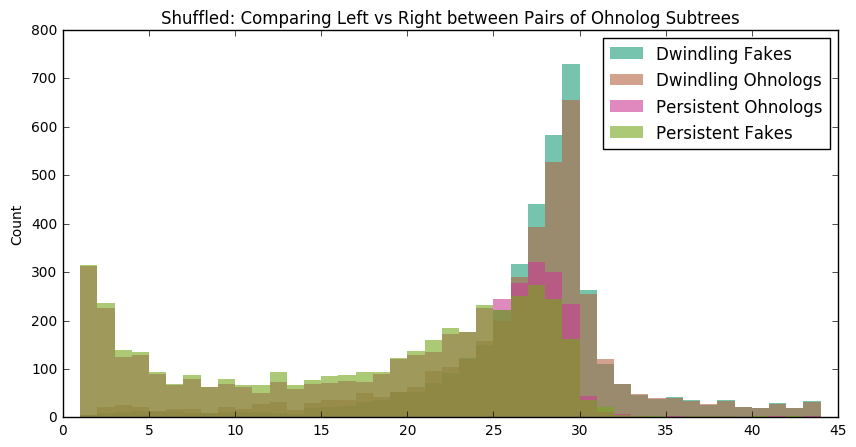

In [64]:
compare_against_shuffled_pairs(extant_copies, left_side, xmax=45)

**NOTE:** The graph labels are currently backwards.

In [65]:
extant_full_families = {k: extant_copies[k] + extant_copies[get_opposite_side(k)] for k in left_side}
len(extant_full_families)

4214

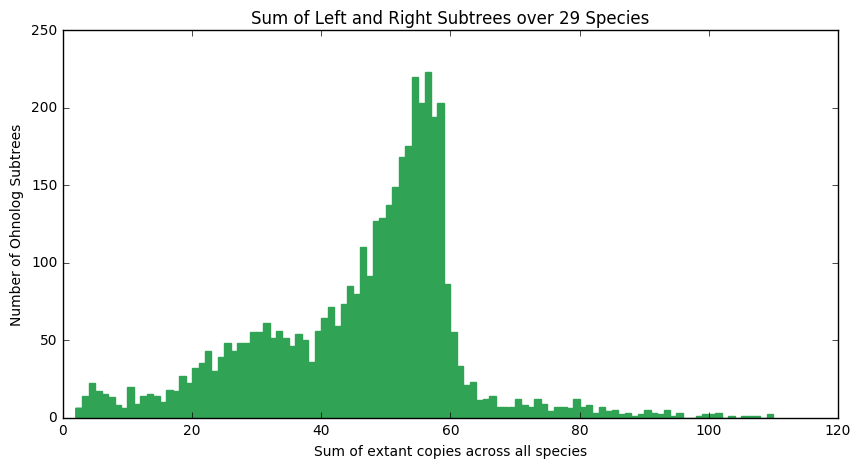

In [66]:
pretty_hist("Sum of Left and Right Subtrees over 29 Species", extant_full_families.values(), 
            x_title="Sum of extant copies across all species", xmax=110,
            y_title="Number of Ohnolog Subtrees")

I'm looking for a peak at 58 (29*2) and a shadow of 10% loss to the left of that peak (53-58).

In [67]:
extant_sums = i_hist(extant_full_families.values())
print(sum(extant_sums[:26]))
extant_sums[:5]

494


[0, 0, 6, 14, 22]

**TODO: Express as % Single Copy and Multicopy like De Smet**

In [68]:
# extant_counts.loc[10000013] + extant_counts.loc[get_opposite_side(10000013)]  #data frame with per species breakdown
from pandas import DataFrame
joined_ohnologs = DataFrame(columns=extant_counts.columns)
for fam in left_side:
    joined_ohnologs.loc[fam%10000000] = extant_counts.loc[fam] + extant_counts.loc[get_opposite_side(fam)]
joined_ohnologs.head()

,Oeuropea<56>,FRAX08<12>,FRAX05<50>,FRAX25<26>,FRAX14<48>,FRAX15<18>,FRAX32<2>,FRAX21<28>,FRAX33<52>,FRAX26<46>,...,FRAX01<14>,FRAX00<20>,FRAX13<44>,FRAX20<32>,FRAX30<0>,FRAX27<36>,FRAX04<38>,FRAX11<34>,FRAX28<4>,FRAX06<22>
4865,2,3,2,2,2,2,2,2,2,2,...,2,1,2,2,2,2,0,2,2,2
4866,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
4869,3,2,2,2,2,2,2,2,1,2,...,1,2,2,1,2,2,2,2,2,2
4870,2,2,2,2,2,2,2,2,2,2,...,0,2,2,2,2,2,2,2,2,2
4871,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [69]:
# This is a test that the table summing went as expected difference between terms should be zero in all columns
assert (joined_ohnologs.loc[4865] - (extant_counts.loc[10004865] + extant_counts.loc[get_opposite_side(10004865)])).any() == 0

In [70]:
joined_ohnologs['Single Copy Species'] = joined_ohnologs.apply(lambda row: [row[col] == 1 for col in extant_counts.columns].count(True), axis=1)
joined_ohnologs['Absent Species'] = joined_ohnologs.apply(lambda row: [row[col] == 0 for col in extant_counts.columns].count(True), axis=1)
joined_ohnologs['Multicopy Species'] = joined_ohnologs.apply(lambda row: [row[col] > 2 for col in extant_counts.columns].count(True), axis=1)

In [71]:
joined_ohnologs.head()

,Oeuropea<56>,FRAX08<12>,FRAX05<50>,FRAX25<26>,FRAX14<48>,FRAX15<18>,FRAX32<2>,FRAX21<28>,FRAX33<52>,FRAX26<46>,...,FRAX20<32>,FRAX30<0>,FRAX27<36>,FRAX04<38>,FRAX11<34>,FRAX28<4>,FRAX06<22>,Single Copy Species,Absent Species,Multicopy Species
4865,2,3,2,2,2,2,2,2,2,2,...,2,2,2,0,2,2,2,4,1,2
4866,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,0,0,0
4869,3,2,2,2,2,2,2,2,1,2,...,1,2,2,2,2,2,2,3,0,1
4870,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,1,1,0
4871,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,0,0,0


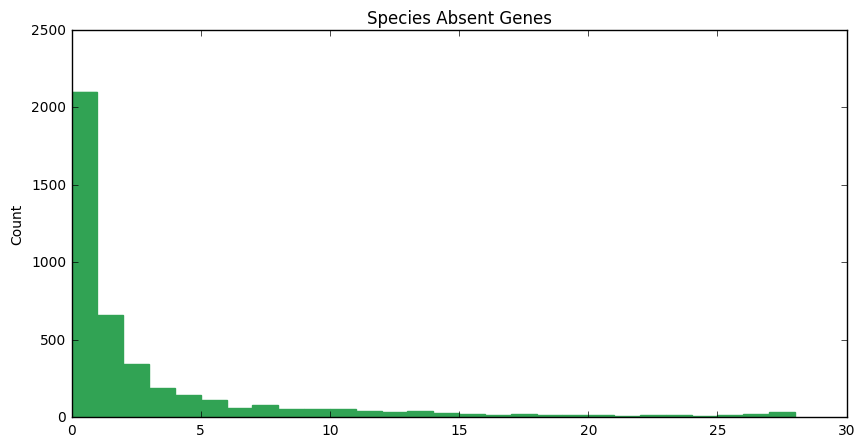

In [72]:
pretty_hist("Species Absent Genes", joined_ohnologs['Absent Species'])

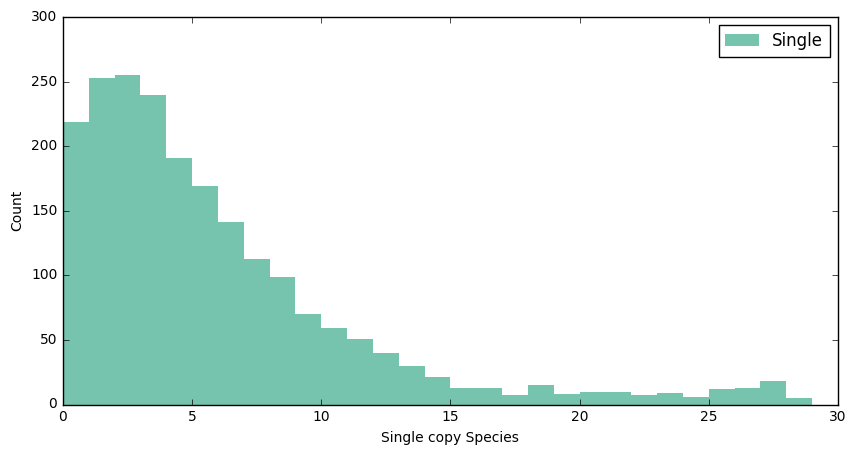

In [73]:
in_all_species = joined_ohnologs[joined_ohnologs['Absent Species'] == 0]
categorical_histogram("", {"Single": in_all_species['Single Copy Species']}, x_title='Single copy Species')
#                           "Multi": in_all_species['Multicopy Species']},)

In [74]:
%%html
<p> Contrast this figure with Gene Duplicability (li 2016).  Filtering is likely to blame.<p>
<img src="../Figures for Notes/Overall Distribution of Single-Copy Percentage for All Angiosperm Core Gene Families.png" width="500">

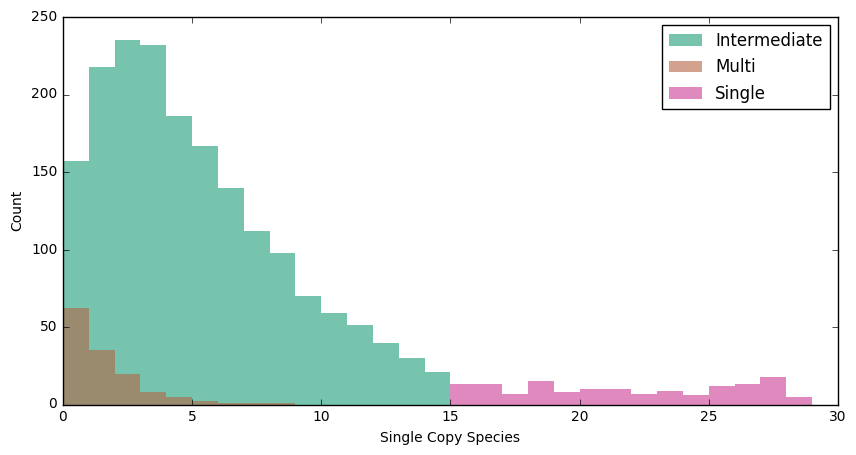

In [75]:
in_all_species = joined_ohnologs[joined_ohnologs['Absent Species'] == 0]
multi_copy = in_all_species['Multicopy Species'] > 14
single_copy = in_all_species['Single Copy Species'] > 14
intermediate = (~multi_copy) & (~single_copy)
# intermediate.sum()

categorical_histogram("", {"Single": in_all_species[single_copy]['Single Copy Species'],
                          "Multi": in_all_species[multi_copy]['Single Copy Species'],#})
                          "Intermediate": in_all_species[intermediate]['Single Copy Species']},
                     x_title='Single Copy Species')

In [76]:
multi_copy.sum() + single_copy.sum() + intermediate.sum() == len(in_all_species)

True

# Mean Copy number per species
Just to make sure that large copies in one species aren't throwing the trend

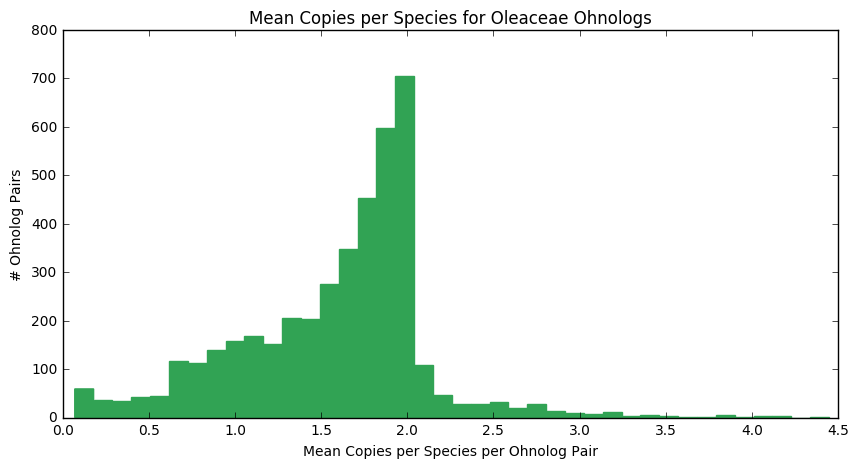

In [77]:
joined_ohnologs['Mean per Species'] = joined_ohnologs.apply(lambda row: row[extant_counts.columns].mean(), axis=1)

pretty_hist('Mean Copies per Species for Oleaceae Ohnologs', joined_ohnologs['Mean per Species'], 
            y_title='# Ohnolog Pairs', 
            x_title='Mean Copies per Species per Ohnolog Pair', 
            bins=40, xmax=5)

##### Needlessly detailed filtering of 0 copy species
joined_ohnologs['Mean per Extant Species'] = joined_ohnologs.apply(lambda row: mean([row[col] for col in extant_counts.columns if row[col] != 0]), axis=1)

pretty_hist('Mean Copies per Extant Species for Single Oleaceae Duplications', joined_ohnologs['Mean per Extant Species'], 
            y_title='# Gene Families with Retained Ohnologs', 
            x_title='Mean Copies per Species per Ohnolog Pair', 
            bins=40, xmax=5)

In [78]:
print(i_hist((joined_ohnologs['Mean per Species'] / 0.1).astype(int)))

[6, 53, 36, 35, 43, 45, 81, 108, 130, 96, 171, 158, 150, 156, 203, 275, 347, 454, 598, 417, 344, 77, 37, 21, 27, 25, 20, 27, 14, 7, 6, 10, 9, 1, 7, 1, 3, 2, 3, 1, 3, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1]


In [79]:
sum([6, 53, 36, 35, 43, 45,])

218

## Bringing in All Ohnologs (any N1 duplication) for filtering control

In [80]:
all_duplicates = read_csv(r"CAFE-4.2\data\homeologs_only\all_N1_duplications_counts.csv", delimiter='\t', index_col='Family ID')

In [81]:
columns = 'Oeuropea	FRAX08	FRAX05	FRAX25	FRAX14	FRAX15	FRAX32	FRAX21	FRAX33	FRAX26	FRAX16	FRAX03	FRAX07	FRAX23	FRAX31	FRAX09	FRAX19	FRAX12	FRAX29	FRAX01	FRAX00	FRAX13	FRAX20	FRAX30	FRAX27	FRAX04	FRAX11	FRAX28	FRAX06'.split()
all_duplicates = all_duplicates[columns]
left_all = [i for i in all_duplicates.index if i >= 20000000] # 20000000
len(left_all)                                                # 10000000

9546

In [82]:
all_duplicates.head()

,Oeuropea,FRAX08,FRAX05,FRAX25,FRAX14,FRAX15,FRAX32,FRAX21,FRAX33,FRAX26,...,FRAX01,FRAX00,FRAX13,FRAX20,FRAX30,FRAX27,FRAX04,FRAX11,FRAX28,FRAX06
Family ID,,,,,,,,,,,,,,,,,,,,,
10000000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10000001,2,1,1,1,0,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
10000002,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10000003,0,0,0,0,0,1,0,0,0,1,...,0,1,1,1,1,0,0,0,0,0
10000005,2,0,0,1,0,1,1,1,2,0,...,2,3,1,0,2,2,1,2,2,2


In [83]:
all_duplicates.loc[get_opposite_side(10000003)]

Oeuropea    25
FRAX08      10
FRAX05       9
FRAX25       9
FRAX14       5
FRAX15       5
FRAX32       9
FRAX21      15
FRAX33       9
FRAX26       7
FRAX16      10
FRAX03       9
FRAX07      13
FRAX23      10
FRAX31      10
FRAX09      12
FRAX19      11
FRAX12       7
FRAX29      14
FRAX01       8
FRAX00      18
FRAX13       9
FRAX20      10
FRAX30       9
FRAX27      11
FRAX04      11
FRAX11      10
FRAX28      10
FRAX06       9
Name: 20000003, dtype: int64

In [84]:
joined_all_ohnologs = DataFrame(columns=all_duplicates.columns)
for fam in left_all:
    joined_all_ohnologs.loc[fam%10000000] = all_duplicates.loc[fam] + all_duplicates.loc[get_opposite_side(fam)]
bad_rows = [row.name for i, row in joined_all_ohnologs.iterrows() if row.sum() == 0]  # That seems like that shouldn't happen...
print(len(bad_rows))
joined_all_ohnologs.drop(bad_rows, axis=0)
len(joined_all_ohnologs)

0


9546

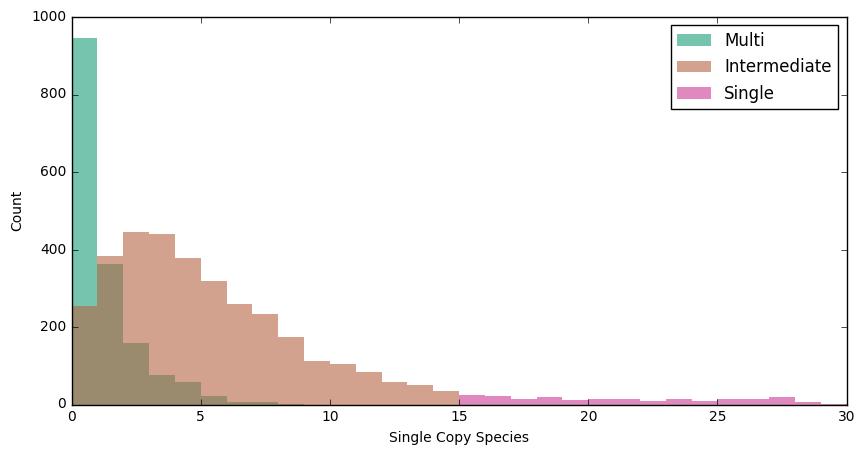

In [85]:
def single_copy_hist(joined_ohnologs, columns):
    joined_ohnologs['Single Copy Species'] = joined_ohnologs.apply(lambda row: [row[col] == 1 for col in columns].count(True), axis=1)
    joined_ohnologs['Absent Species'] = joined_ohnologs.apply(lambda row: [row[col] == 0 for col in columns].count(True), axis=1)
    joined_ohnologs['Multicopy Species'] = joined_ohnologs.apply(lambda row: [row[col] > 2 for col in columns].count(True), axis=1)

    in_all_species = joined_ohnologs[joined_ohnologs['Absent Species'] == 0]
    multi_copy = in_all_species['Multicopy Species'] > 14
    single_copy = in_all_species['Single Copy Species'] > 14
    intermediate = (~multi_copy) & (~single_copy)
    # intermediate.sum()

    categorical_histogram("", {"Single": in_all_species[single_copy]['Single Copy Species'],
                              "Multi": in_all_species[multi_copy]['Single Copy Species'],#})
                              "Intermediate": in_all_species[intermediate]['Single Copy Species']},
                         x_title='Single Copy Species')
    
single_copy_hist(joined_all_ohnologs, columns)

In [86]:
joined_all_ohnologs['Mean per Species'] = joined_all_ohnologs.apply(lambda row: row[columns].mean(), axis=1)

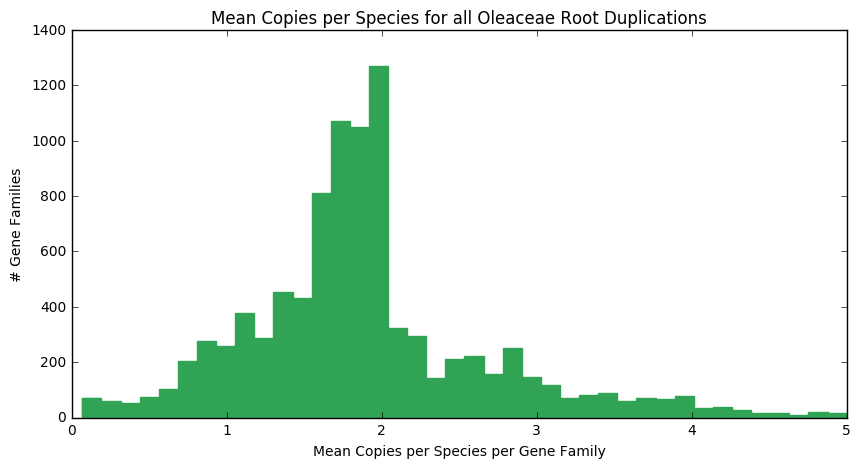

In [87]:
pretty_hist('Mean Copies per Species for all Oleaceae Root Duplications', joined_all_ohnologs['Mean per Species'], 
            y_title='# Gene Families', 
            x_title='Mean Copies per Species per Gene Family', 
            bins=40, xmax=5)

##### Needlessly complicated sum, hard to interpret
joined_all_ohnologs['Sum'] = joined_all_ohnologs.apply(lambda row: row[columns].sum(), axis=1)

pretty_hist("Sum of Every Ohnolog per Family over 29 Species", joined_all_ohnologs['Sum'], 
            x_title="Sum of extant copies across all species", xmax=180,
            y_title="Number of Ohnolog Families")

### Expressed as Percentage of the larger 100% - 0%

In [88]:
def percent_size_difference(left_side, event_dict):
    size_difference = {}
    absolute_differences = {}
    for left in left_side:
        right = get_opposite_side(left)
        biggest = max(event_dict[left], event_dict[right]) # less loss events ~= more extant copies
        smallest = min(event_dict[left], event_dict[right])
        size_difference[left] = smallest / biggest
        size_difference[right] = biggest / smallest
        absolute_differences[left] = smallest - biggest
        absolute_differences[right] = biggest - smallest
    return size_difference, absolute_differences
size_differences, absolute_differences = percent_size_difference(left_side, extant_copies)
len(size_differences)

8428

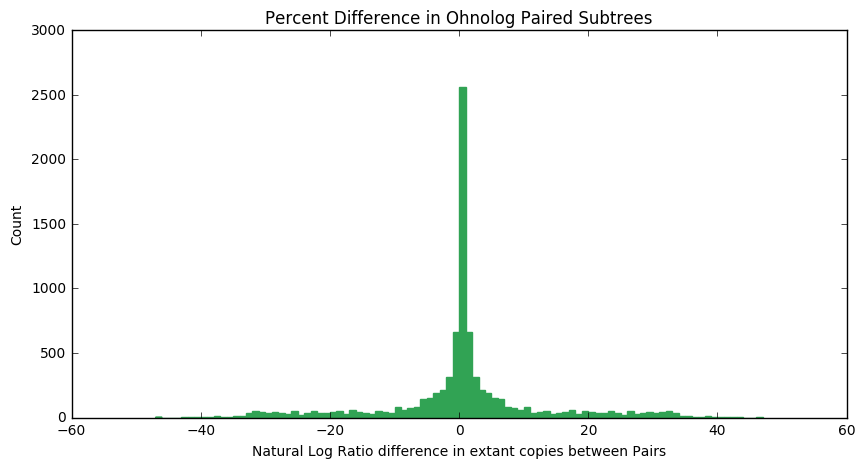

In [89]:
from math import log
pretty_hist("Percent Difference in Ohnolog Paired Subtrees", [int(log(v)*10) for v in size_differences.values()], x_title="Natural Log Ratio difference in extant copies between Pairs")

In [90]:
len([v for v in size_differences.values() if v > 2])  # 1259 == 29% of the pairs are double the size of their partner

1259

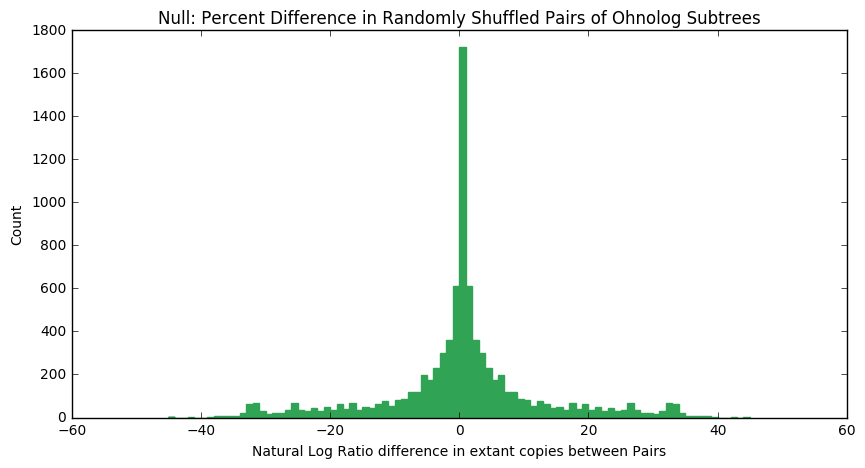

In [91]:
shuffled_events = shuffler(extant_copies)
shuffled_differences, shuffled_absolutes = percent_size_difference(left_side, shuffled_events)
pretty_hist("Null: Percent Difference in Randomly Shuffled Pairs of Ohnolog Subtrees", [int(log(v)*10) for v in shuffled_differences.values()], x_title="Natural Log Ratio difference in extant copies between Pairs")

In [92]:
pp(len([v for v in size_differences.values() if v > 2]) / (len(size_differences)//2))

'29.876602%'

In [93]:
# Size cutoffs
for cutoff in range(1, 30):
    print(cutoff, pp(len([v for v in size_differences.values() if v > cutoff]) / (len(size_differences)//2)))

1 91.338396%
2 29.876602%
3 22.994779%
4 19.933555%
5 18.035121%
6 16.184148%
7 14.736592%
8 13.289037%
9 12.387280%
10 11.248220%
11 10.393925%
12 9.563360%
13 9.041291%
14 8.305648%
15 7.498813%
16 7.237779%
17 6.691979%
18 6.288562%
19 5.813953%
20 5.315615%
21 4.841006%
22 4.508780%
23 4.176554%
24 3.535833%
25 3.037494%
26 2.681538%
27 2.278121%
28 1.779782%
29 1.447556%


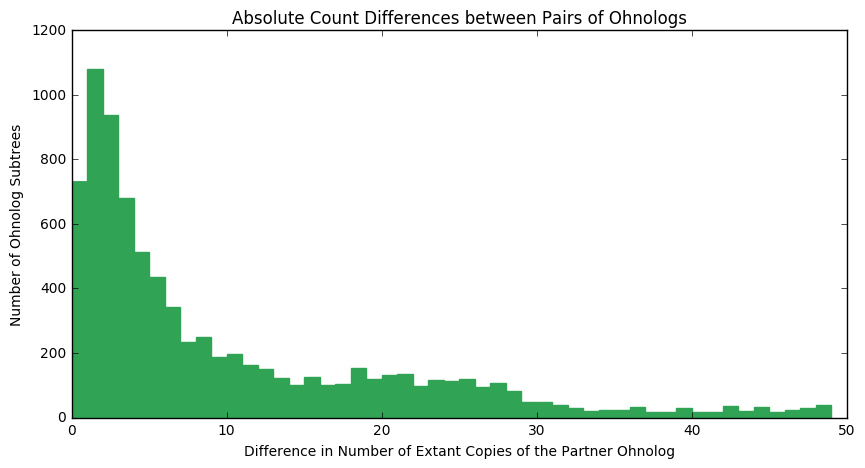

In [94]:
diff_vals = [abs(v) for v in absolute_differences.values() if -50 < v < 50]
pretty_hist("Absolute Count Differences between Pairs of Ohnologs", diff_vals,
           x_title="Difference in Number of Extant Copies of the Partner Ohnolog",
           y_title="Number of Ohnolog Subtrees")

In [95]:
pp(len([v for v in absolute_differences.values() if 15 < v ]) / (len(extant_copies) / 2))

'25.889891%'

At first glance, it looks like there is a subgroup that could be classified as having antagonistic dosage between the two ohnlog subtrees where the copy number difference is greater than 15.

In [96]:
%%html
<img src="CAFE-4.2/data/homeologs_only/reports/Pairs of Ohnologs show Similar Extant Copy Numbers.png">

However, we should test that explanation against our null model:

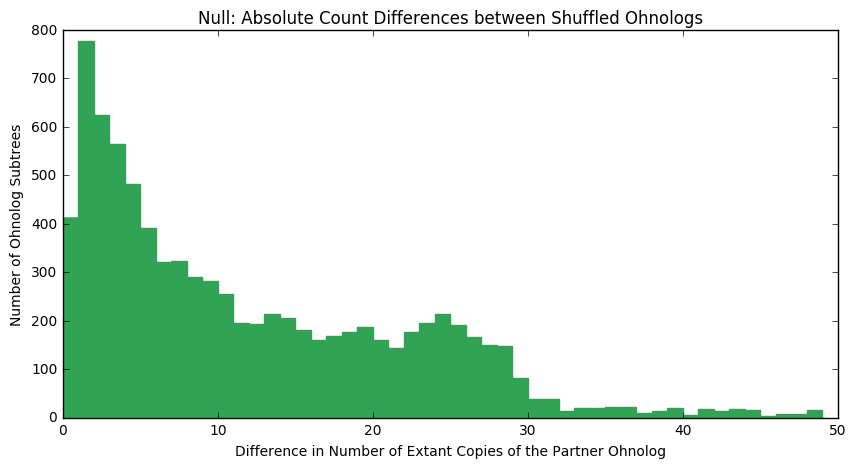

In [97]:
shuffle_vals = [abs(v) for v in shuffled_absolutes.values() if -50 < v < 50]
pretty_hist("Null: Absolute Count Differences between Shuffled Ohnologs", shuffle_vals,
           x_title="Difference in Number of Extant Copies of the Partner Ohnolog",
           y_title="Number of Ohnolog Subtrees")

In [98]:
ranksums(shuffle_vals, diff_vals, )

RanksumsResult(statistic=16.996860903093626, pvalue=8.663672490438297e-65)

**Conclusion:** The apparent shoulders actually become more defined when we shuffle the pairs.  That to me indicates that the shoulders come from the distribution of sizes in general and that since there's a positive correlation in sizes of actual pairs, the observable pattern is actually stronger in the null than the real.  The "antagonistic dosage" is not a good explanation.

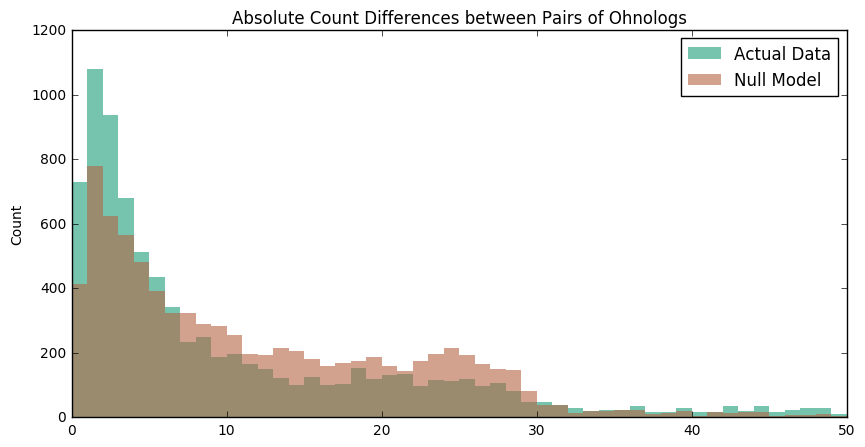

In [99]:
categorical_histogram("Absolute Count Differences between Pairs of Ohnologs", {"Null Model": shuffle_vals, "Actual Data": diff_vals})

In [100]:
max(diff_vals)

49

----------------------

# Null Model from Simulation Comparison

This was completed in a separate notebook entitled **TreeCountAnalysis_Simulated_Ohnologs**

--------------

**Never used:**

## Null model for deletion events
Assume a uniform probability of having a deletion at any time point per branch.  Veto deletions that would drop the number to 0 in FRAX00.  Keep creating deletions until the average copy# per extant species matches for that family.

Construct one path for each species.  Path is a set of nodes.  Randomly pick species.  Randomly pick node weighted by node length.  Add a loss event, repeat until average is acheived.  Graph ensuing histogram

```
constraints = FRAX00 must have > 0,  no species has less than 0
n_deletions = 2 * 6 - sum(
for family_tree in all_trees:
    for path in species_paths:
        
        while current_count > terminal_count[species]:
            branch = random.choice(path, weights)
            branch.count -= 1
            for d in branch.descendants:
                branch.count -= 1
                if d.count < actual_count:
                    veto deletion
                #this is getting really complicated
```